<h1>Instart Market Basket Analysis</h1>
<br></br>
<div>
    Instacart is an American company that operates a grocery delivery and pick-up service in the United States and Canada.
Consumers in Instacart order large basket sizes of diverse foods over and over and over again from them. They have more density on our user behavior than any e-commerce company.

Work of a data Scientist in Instacart: https://tech.instacart.com/data-science-at-instacart-dabbd2d3f279

As having a huge user behavior data density, Instacart work in recommendation of products to the customer, as mentioned in the above URL. This problem focuses on improving the recommendation system to the user for more hand on experience for the user to suggest or recommend type of products to fill the basket, hence Instacart market basket analysis.

Based on previous orders the model have to predict the what will user ultimately re-order, and with more precision, N number of most applicable recommendations for a user.

For Deployment, Instacart as a company AB-Test every model for better user experience and better analysis of the model performance.

</div>

<br></br>

<h1>Buisness-Problem </h1>
<div>
    The buisness problem we are solving is recommending the accurate products to the usere for a user friendly expirience for the customer.<br>
    There is<br>
    <ol>
        <li>Latency-constraints </li>
        <li>Accuracy-constraints</li>
    </ol>
    
    

<h1>Metrics Used</h1>
<ul>
    <li>Confusion-Matrix</li>
    <li>AUC-ROC</li>
    <li>AUC-PR</li>
</ul>
    

<h1> Analysis for the Instacart-Market-Basket-Analysis </h1>
<br></br>
    <div>
    Data-Set-Accomposition : <a href="https://www.kaggle.com/c/instacart-market-basket-analysis/discussion/99252">Instacart-Market-Data</a>
    </div>
    

<h4> LIBRARIES </h4>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from PIL import Image
from astropy.stats import circmean, circvar

from tqdm import tqdm
import sqlite3
import pickle
from scipy.linalg import svd
from sklearn.decomposition import LatentDirichletAllocation

<h4> Acquiring Data</h4>

In [2]:
aisles_data = pd.read_csv("instacart-market-basket-analysis/aisles.csv/aisles.csv")
departments_data = pd.read_csv("instacart-market-basket-analysis/departments.csv/departments.csv")
or_prod_prior = pd.read_csv("instacart-market-basket-analysis/order_products__prior.csv/order_products__prior.csv")
or_prod_train = pd.read_csv("instacart-market-basket-analysis/order_products__train.csv/order_products__train.csv")
orders_data = pd.read_csv("instacart-market-basket-analysis/orders.csv/orders.csv")
product_data = pd.read_csv("instacart-market-basket-analysis/products.csv/products.csv")

<h4> Looking at the structures of each csv file </h4>

In [ ]:
aisles_data.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
departments_data.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
or_prod_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
or_prod_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


<div>
    Note : Structure of or_prod_prior == Structure of or_prod_train
    </div>

In [ ]:
orders_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
product_data.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<h3> Link Between Files </h3>

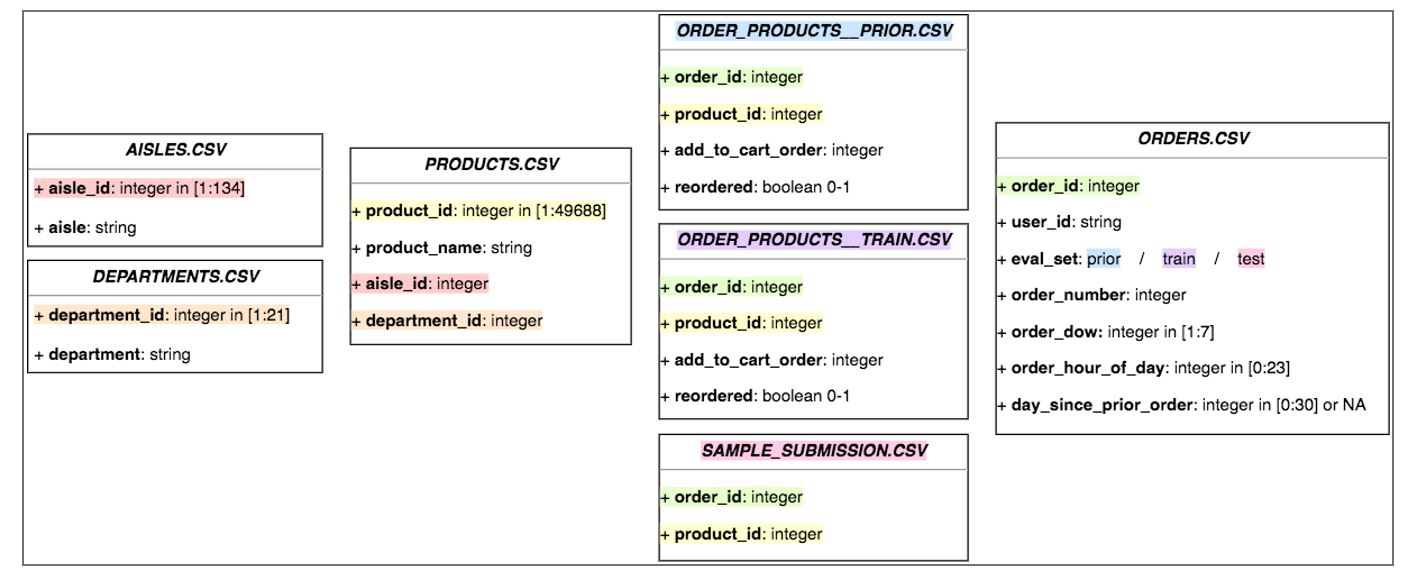

In [3]:
img = Image.open("Capture.JPG")
img

<h4>Concatenating all the files into one data frame for analysis</h4>

In [ ]:
orders_prod = pd.concat([or_prod_prior , or_prod_train])
orders_prod.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
orders_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 1.3 GB


<div>
    Note: Total of 33819106 entries in the data set
    </div>

<div>
    <b>Given in the discussion of the kaggle link,the order_prod data set doesnt have the values of "test" data set, so create a test data set using orders data.As we concatenated prior and train data</b> 
    </div>

In [ ]:
orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
orders_test = orders_data[orders_data.eval_set == "test"]
orders_test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


In [ ]:
orders_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75000 entries, 38 to 3421068
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                75000 non-null  int64  
 1   user_id                 75000 non-null  int64  
 2   eval_set                75000 non-null  object 
 3   order_number            75000 non-null  int64  
 4   order_dow               75000 non-null  int64  
 5   order_hour_of_day       75000 non-null  int64  
 6   days_since_prior_order  75000 non-null  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 4.6+ MB


<h3> Skip this cell,Directly load the data set <h3>

In [ ]:
data = pd.merge(orders_data ,orders_prod, on="order_id")
data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [ ]:
data.to_csv("Data_with_ordersid_merged.csv" , index = True)

<h3>
    <b>Directly Run this cell</b>
   </h3>
  

In [3]:
data = pd.read_csv("Data_with_ordersid_merged.csv")
data.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,0,2539329,1,prior,1,2,8,NaN,196,1,0
1,1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,4,2539329,1,prior,1,2,8,NaN,26405,5,0


<h3> Analysis </h3>

<div>
    <b>Q. What to do with data?</b>
    </div>

We have total amount of 206209 users , with which we have reorders for 131209 customers in the prior equal to train

We have to predict the reorders for 75000 customers in the test data set

DISTRIBUTION OF PRIOR , TRAIN AND TEST in Eval_set of orders


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


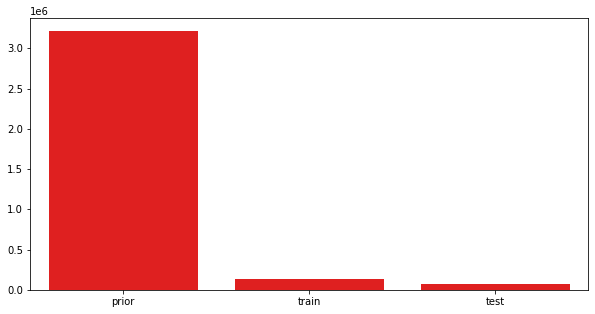

In [ ]:
print("We have total amount of {} users , with which we have reorders for {} customers in the prior equal to train".format(len(data.user_id.unique()) , len(orders_data[orders_data.eval_set == "train"].eval_set)))
print()
print("We have to predict the reorders for {} customers in the test data set".format(len(orders_test.eval_set)))
print()
print("="*75)
print("DISTRIBUTION OF PRIOR , TRAIN AND TEST in Eval_set of orders")
print("="*75)
X = orders_data.eval_set.value_counts().index
Y = orders_data.eval_set.value_counts().values

plt.figure(figsize=(10,5))
sns.barplot(X , Y , color = "red")
plt.show()


<h3> Features to look </h3>

In [ ]:
for i in data.columns:
    print(i)

Unnamed: 0
order_id
user_id
eval_set
order_number
order_dow
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered


<h3>Observations</h3>
<br>
<div>
    As order_id,user_id,eval_set do not give specific information about the data set,so we start the analysis with order_number and will go on to add_to_cart_order.
    </div>

<h3> ORDER_NUMBER <h3>

The value counts of oder numbers for all the customers.
Order-count ,Frequrncy
1      2078068
3      2050731
2      2048332
4      1970180
5      1751959
        ...   
96       14215
97       13691
98       13150
99       12686
100       7624
Name: order_number, Length: 100, dtype: int64

As we can see no order_count'frequency is 0


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


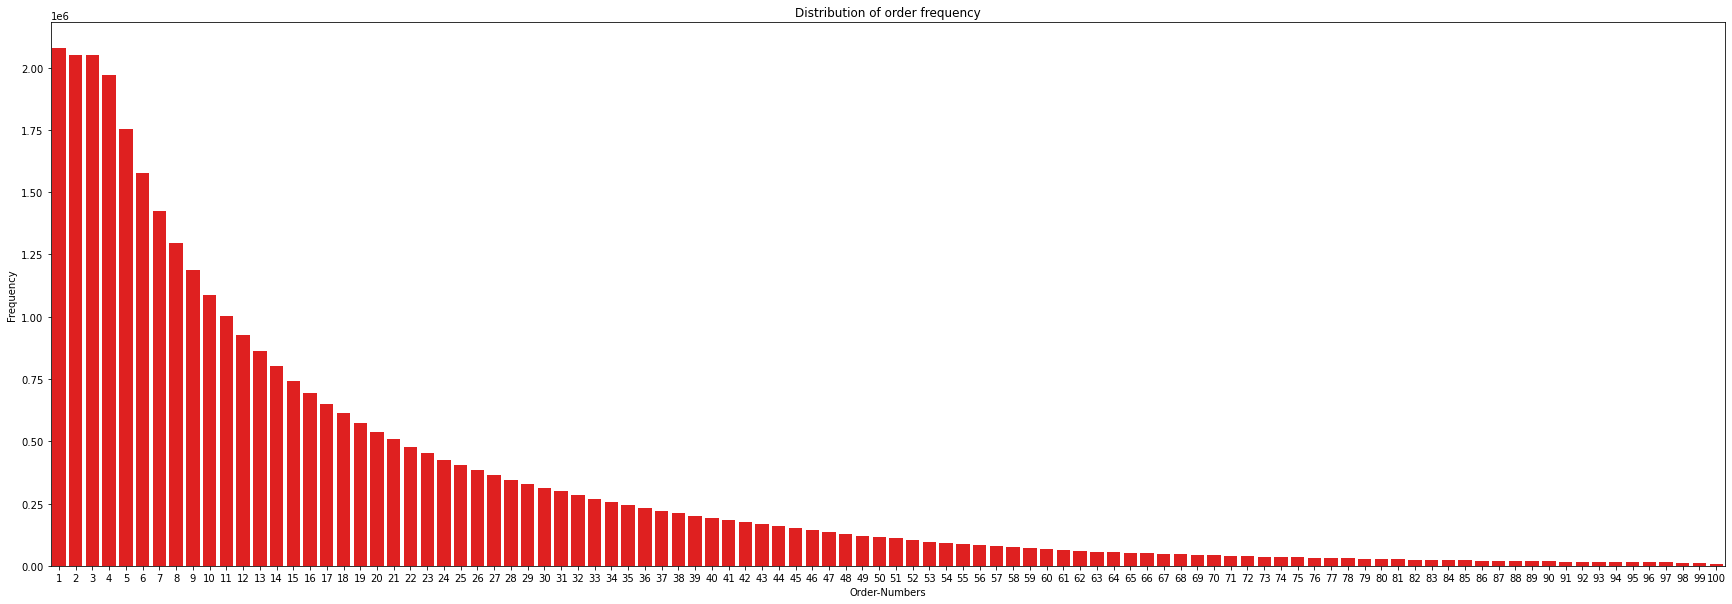

From this we can see the curve is as expected to be right-skewed,
 i.e a positive skew can be seem in the behaviour of the order-numbers.


In [5]:
print("The value counts of oder numbers for all the customers.")
print("Order-count ,Frequrncy")
print(data.order_number.value_counts())
print()
print("As we can see no order_count'frequency is 0")

X = data.order_number.value_counts().index
Y = data.order_number.value_counts().values

plt.figure(figsize=(30,10))
sns.barplot(X,Y,color = "red")
plt.title("Distribution of order frequency")
plt.xlabel("Order-Numbers")
plt.ylabel("Frequency")

plt.show()

print("From this we can see the curve is as expected to be right-skewed,\n i.e a positive skew can be seem in the behaviour of the order-numbers.")

<h3> Box-Plot-Order-Numbers </h3>

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

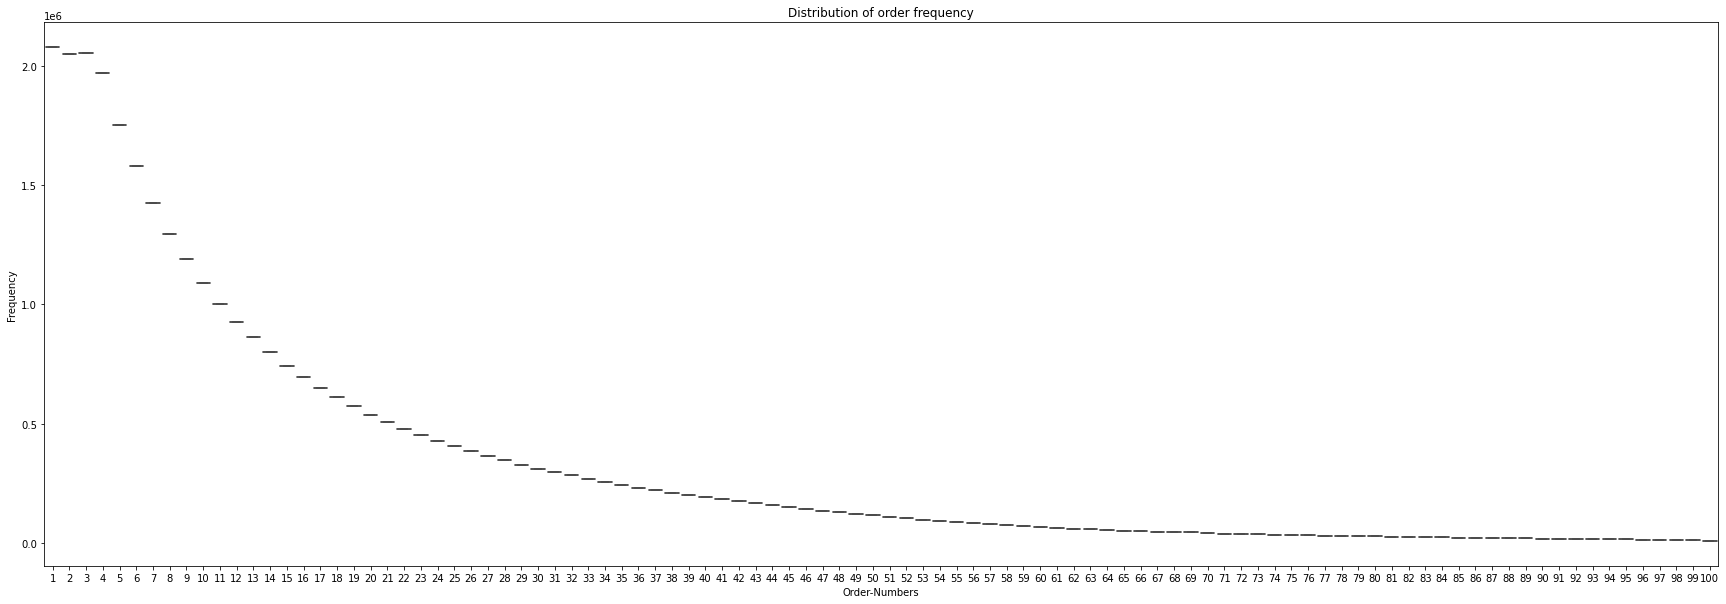

In [6]:
X = data.order_number.value_counts().index
Y = data.order_number.value_counts().values

plt.figure(figsize=(30,10))
sns.boxplot(X,Y,color="red")
plt.title("Distribution of order frequency")
plt.xlabel("Order-Numbers")
plt.ylabel("Frequency")


<h3>Observation</h3>
<div>
    As we can see that the freq-VS-Order-numbers is following <b>Pereto Distribution</b>,as there is too much right skewness on the plot.
    </div>
 
<h3> Check For Pereto Distribution Test </h3>

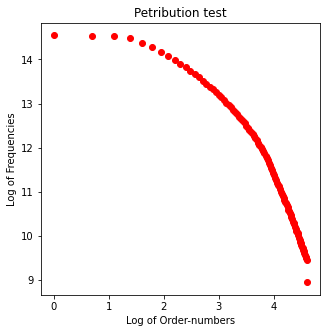

Observation Note:
As the line is not a strainght-slant line as x=y,so it is not a pereto distribution.


In [ ]:
X = np.log(data.order_number.value_counts().index)
Y = np.log(data.order_number.value_counts().values)

plt.figure(figsize=(5,5))
plt.scatter(X,Y , color = "red")

plt.xlabel("Log of Order-numbers")
plt.ylabel("Log of Frequencies")
plt.title("Petribution test")

plt.show()
print("="*75)
print("Observation Note:")
print("As the line is not a strainght-slant line as x=y,so it is not a pereto distribution.")
print("="*75)

<h3> Order-Dow <h3>


Seeing the number of orders done per day with analysis will show how the customer orders in a certain day.

There are 7 daya with average order of 4831300.857142857 each day

0    6533692
1    5871834
2    4378360
3    3998498
4    3942696
5    4386443
6    4707583
Name: order_dow, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


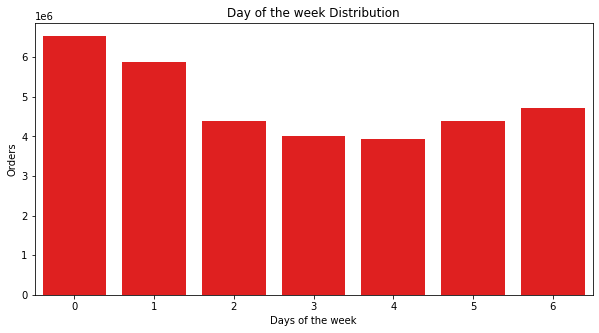

In [ ]:
print("Seeing the number of orders done per day with analysis will show how the customer orders in a certain day.")
print()
print("There are {} daya with average order of {} each day".format(len(data.order_dow.value_counts().sort_index().index) , np.mean(data.order_dow.value_counts().values)))
print()
print(data.order_dow.value_counts().sort_index())
X = data.order_dow.value_counts().sort_index().index
Y = data.order_dow.value_counts().sort_index().values

plt.figure(figsize=(10,5))
sns.barplot(X , Y , color = "red")
plt.xlabel("Days of the week")
plt.ylabel("Orders")
plt.title("Day of the week Distribution")

plt.show()

<h4> Observations </h4>
<br>
<div>
    Seeing the the bar plot,it is clear that the day 0 and 1 are the days with maximum orders comming in which raises the question are 0 and 1 weekends or not?
    
    Most probably "yes"
    
    Assumption that these are weekends,i.e 0-Saturday , 1-Sunday and so on.
    
   </div>

<h3>Order_hour_of_day<h3>

Order of the day gives the information as when then customer tends to buy the products in a day

With 24 hours,mean of this distribution for every customer is 1409129.4166666667
0      228031
1      121412
2       72660
3       53759
4       55714
5       91909
6      302642
7      928239
8     1787359
9     2550569
10    2874905
11    2852701
12    2732599
13    2778054
14    2810918
15    2780731
16    2647695
17    2186409
18    1714445
19    1317576
20    1017958
21     831183
22     662053
23     419585
Name: order_hour_of_day, dtype: int64


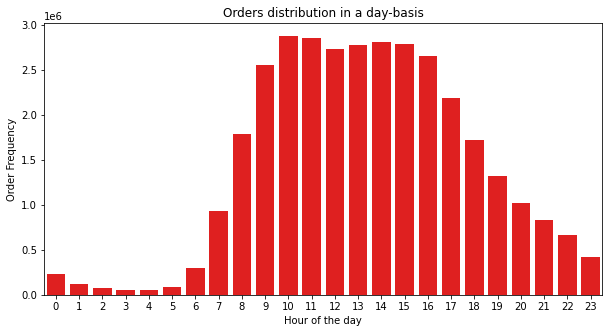

In [ ]:
var = data.order_hour_of_day.value_counts().sort_index()
print("Order of the day gives the information as when then customer tends to buy the products in a day")
print()
print("With {} hours,mean of this distribution for every customer is {}".format(len(var.index) , np.mean(var.values)))
print(var)

plt.figure(figsize=(10,5))
sns.countplot(x = "order_hour_of_day" , data = data , color = "red")
plt.xlabel("Hour of the day")
plt.ylabel("Order Frequency")
plt.title("Orders distribution in a day-basis")
plt.show()

<h3> Observations </h3>
<br>
<div>
Maximum orders are ordered in between 10th and 16th hour of the day

</div>

<h3> Combining Hour of the day  and day of the week distributions</h3>


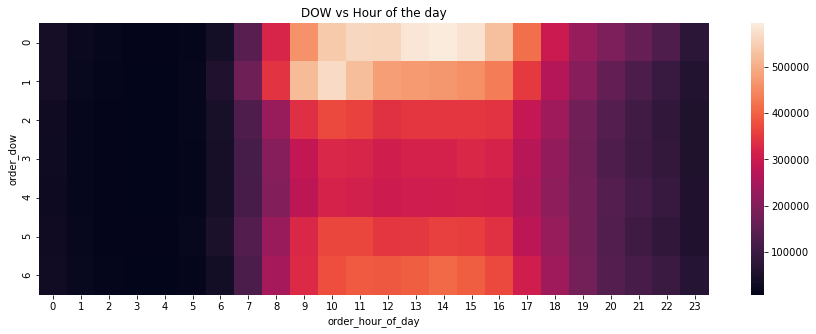

In [ ]:
var = data.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

var = var.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(15,5))

sns.heatmap(var , color="pink")
plt.title("DOW vs Hour of the day")

plt.show()

<h3> Observations </h3>
<br>
<div>
As more no. of orders are ordered in the mid-day with saturday afternoon and sunday morning.
    </div>

<h3>Days_since_prior_order<h3>

Days since prior order gives intution of the user behaviour with the product.

Mean = 1023904.4516129033

0.0      465742
1.0      960381
2.0     1492379
3.0     1914431
4.0     2126287
5.0     2180537
6.0     2592077
7.0     3586305
8.0     1995636
9.0     1262383
10.0    1003366
11.0     854391
12.0     808260
13.0     890959
14.0    1082295
15.0     705361
16.0     485824
17.0     403367
18.0     371041
19.0     355803
20.0     404037
21.0     473730
22.0     329575
23.0     241605
24.0     207537
25.0     194638
26.0     190449
27.0     219711
28.0     274572
29.0     191037
30.0    3477322
Name: days_since_prior_order, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


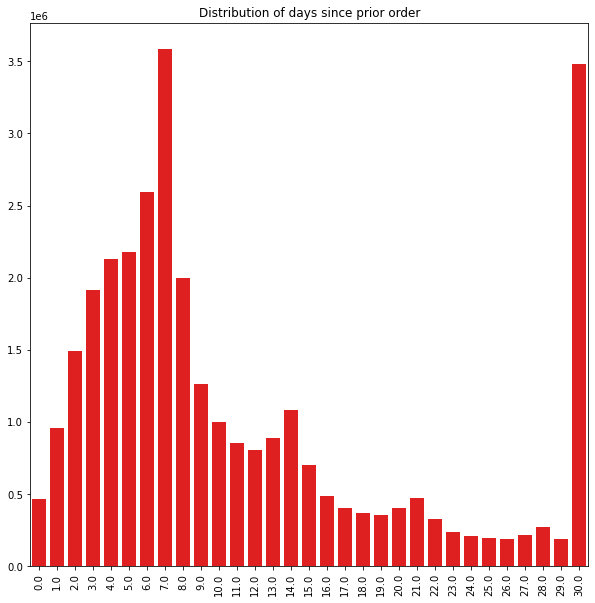

In [ ]:
var = data.days_since_prior_order.value_counts().sort_index()

print("Days since prior order gives intution of the user behaviour with the product.")
print()
print("Mean = {}".format(np.mean(var.values)))
print()
print(var)
plt.figure(figsize=(10,10))
sns.barplot(var.index , var.values , color = "red")
plt.title("Distribution of days since prior order")
plt.xticks(rotation = "vertical")

plt.show()

<h3> Observations </h3>
<br>
   <div>
     As we can see,reordering rate is maximum at 30 days and 7 days,means maximum users tend to reorder after 7 or 30 days. 
     </div>

<h3> Add_to_cart_order<h3>

Days since prior order gives intution of the user behaviour with the product.

Mean 233235.21379310344
1      3346083
2      3182490
3      2988129
4      2773069
5      2542770
        ...   
144          1
140          1
139          1
138          1
145          1
Name: add_to_cart_order, Length: 145, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


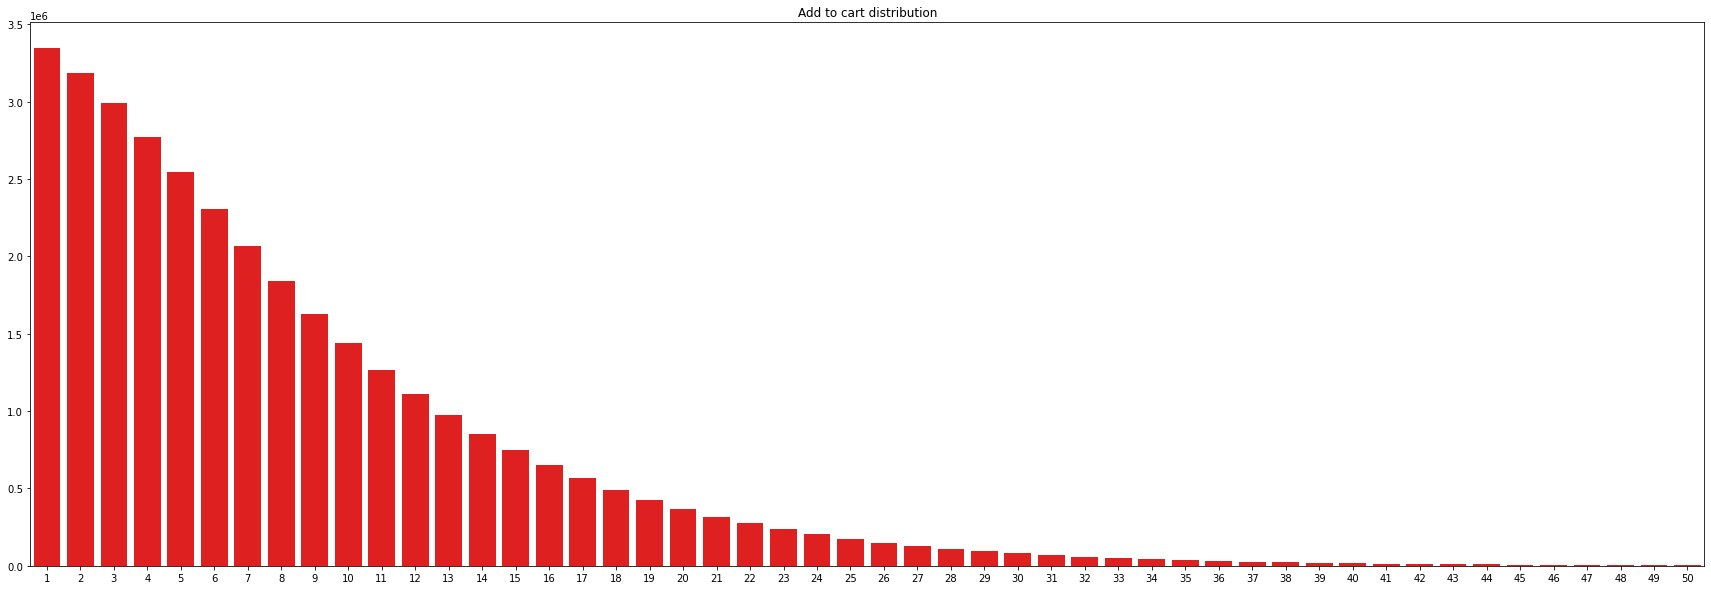

In [8]:
var = data.add_to_cart_order.value_counts()
print("Days since prior order gives intution of the user behaviour with the product.")
print()
print("Mean {}".format(np.mean(var.values)))
print(var)

plt.figure(figsize=(30,10))
sns.barplot(var.index[:50] , var.values[:50] , color = "red")

plt.title("Add to cart distribution")

plt.show()


<h3> Box-plot-Add_to_cart_order </h3>

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

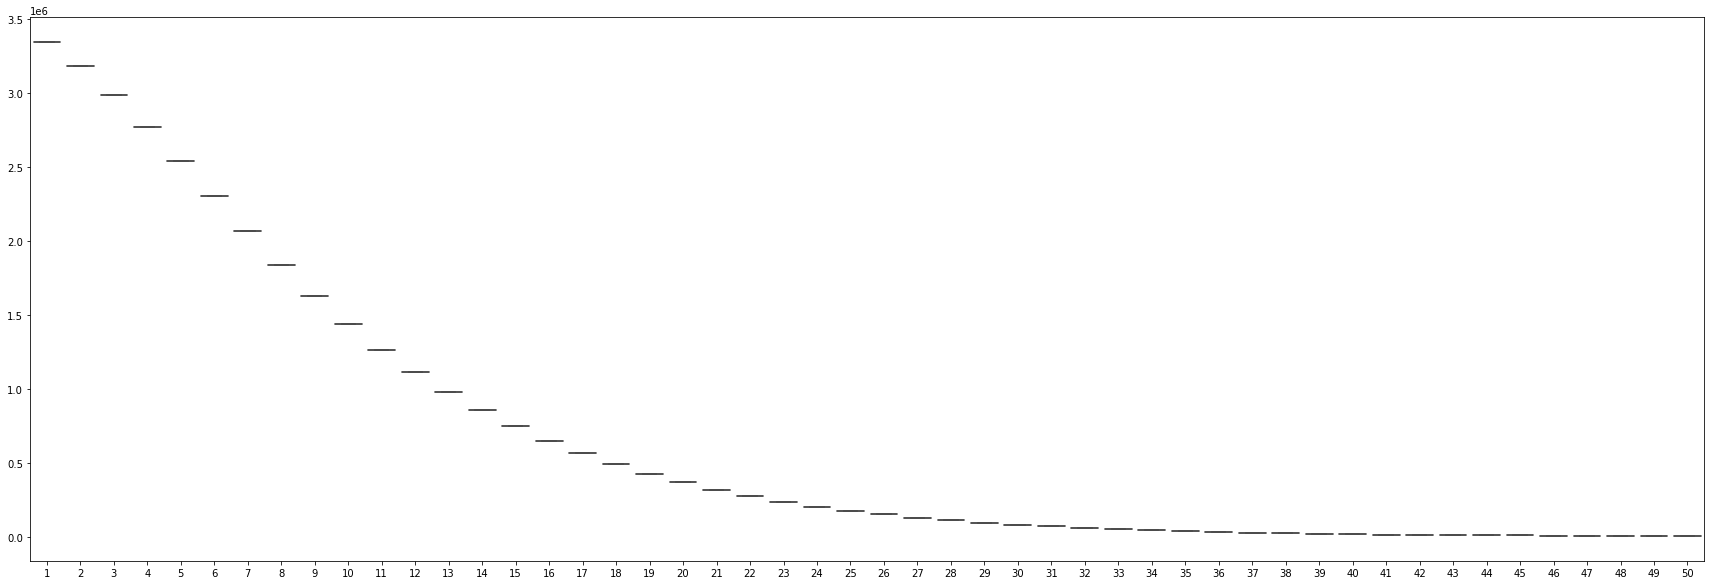

In [9]:
plt.figure(figsize=(30,10))
sns.boxplot(var.index[:50] , var.values[:50] , color = "red")

<h3> Observation </h3>

<div>
    As we can see that the freq-VS-Add-to-cart-number is following <b>Pereto Distribution</b>,as there is too much right skewness on the plot.
    </div>
 
<h3> Check For Pereto Distribution Test </h3>

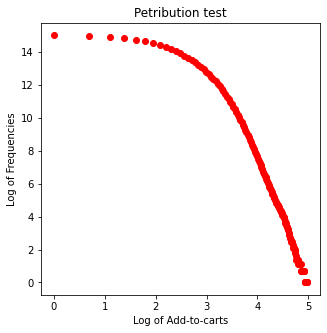

Observation Note:
As the line is not a strainght-slant line as x=y,so it is not a pereto distribution.


In [ ]:
X = np.log(var.index)
Y = np.log(var.values)

plt.figure(figsize=(5,5))
plt.scatter(X,Y , color = "red")

plt.xlabel("Log of Add-to-carts")
plt.ylabel("Log of Frequencies")
plt.title("Petribution test")

plt.show()

print("="*75)
print("Observation Note:")
print("As the line is not a strainght-slant line as x=y,so it is not a pereto distribution.")
print("="*75)


<h2> Observation Summary 1</h2>

<p>
In this analysis we concatenated the train and prior data sets and then used the orders data set and mergerd the two in to one.
</p>
<br></br>
<p>
Then we we saw that how the is the distribution of every column in the data set i.e:
   <ol>
       <li>order_id</li>
       <li>user_id</li>
       <li>eval_set</li>
       <li>order_number</li>
       <li>order_dow</li>
       <li>order_hour_of_day</li>
       <li>days_since_prior_order</li>
       <li>product_id</li>
       <li>add_to_cart_order</li>
       </ol>
</p>
<p>
Ignoring the IDs distribution,as they are just unique values with increasing pdf.
    
Now,as this is a recomendation problem,reorder is treated as ylabel for the train and prior data set and we are given test data set in the eval set which we created and we have to predict the reordering for those samples.

 We are also given
    <br>
    <ol>
        <li>aisles.csv</li>
        <li>products.csv</li>
        <li>departments.csv</li>
        </ol>
 so we ll concatenate these with the order data set and then see how every column changes or variates the reordering pattern of the customer to get adequate features.
</p>

<h3> Reorder Distribution in the data set </h3>

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


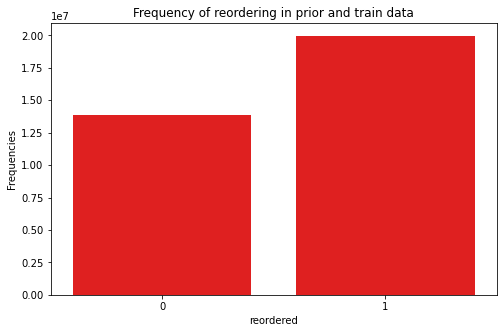

Number of reordered items are more in the data set for all the customers orders.


In [ ]:
var = data.reordered.value_counts()

plt.figure(figsize = (8,5))
sns.barplot(var.index,var.values , color = "red")
plt.xlabel("reordered")
plt.ylabel("Frequencies")
plt.title("Frequency of reordering in prior and train data")

plt.show()

print("Number of reordered items are more in the data set for all the customers orders.")


Lets see the distribution of reordered items in train data set

Percentage of reordered items in the train set is 0.5985944127509629


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


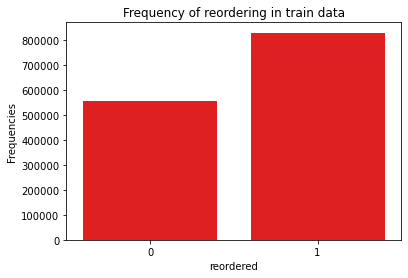

In [ ]:
print("Lets see the distribution of reordered items in train data set")
print()
var = or_prod_train.reordered.value_counts()
values = [i/or_prod_train.shape[0] for i in var.values]
print("Point Percentage of reordered items in the train set is {}".format(values[0]))

sns.barplot(var.index,var.values , color = "red")
plt.xlabel("reordered")
plt.ylabel("Frequencies")
plt.title("Frequency of reordering in train data")

plt.show()


Lets see the distribution of reordered items in prior data set

Point Percentage of reordered items in the train set is 0.5896974667922161


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


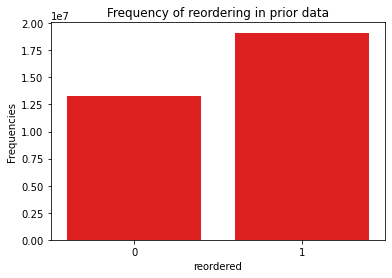

In [ ]:
print("Lets see the distribution of reordered items in prior data set")
print()
var = or_prod_prior.reordered.value_counts()
values = [i/or_prod_prior.shape[0] for i in var.values]
print("Point Percentage of reordered items in the train set is {}".format(values[0]))

sns.barplot(var.index,var.values , color = "red")
plt.xlabel("reordered")
plt.ylabel("Frequencies")
plt.title("Frequency of reordering in prior data")

plt.show()

<h3> Observation </h3>
<br>
<div>
    As we can see the in the whole the percentage of reordering the data set is 59% on an average
    </div>

<div>
Now the prior data set has the distribution of all the customers and we have aisles, department and products dataset so we ll merge all these dataset together for seeing the relationship with rorder.
    </div>

In [ ]:
prior_merged = pd.merge(or_prod_prior , product_data , on = "product_id" , how = "left")
prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [ ]:
prior_merged = pd.merge(prior_merged , aisles_data , on="aisle_id" , how="left")
prior_merged.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [ ]:
prior_merged_ = pd.merge(prior_merged , departments_data , on ="department_id" , how="left")
prior_merged.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [ ]:
prior_merged_.to_csv("prior_merged_.csv" , index = True)

In [ ]:
prior_merged_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Unnamed: 0         int64 
 1   order_id           int64 
 2   product_id         int64 
 3   add_to_cart_order  int64 
 4   reordered          int64 
 5   product_name       object
 6   aisle_id           int64 
 7   department_id      int64 
 8   aisle              object
 9   department         object
dtypes: int64(7), object(3)
memory usage: 2.7+ GB


<h3> Analysis on Products of the data set </h3>

In [ ]:
data = prior_merged_

There are 49677 products with mean orderings of 652.90756285605
Values of the Graph :
Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
Name: product_name, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


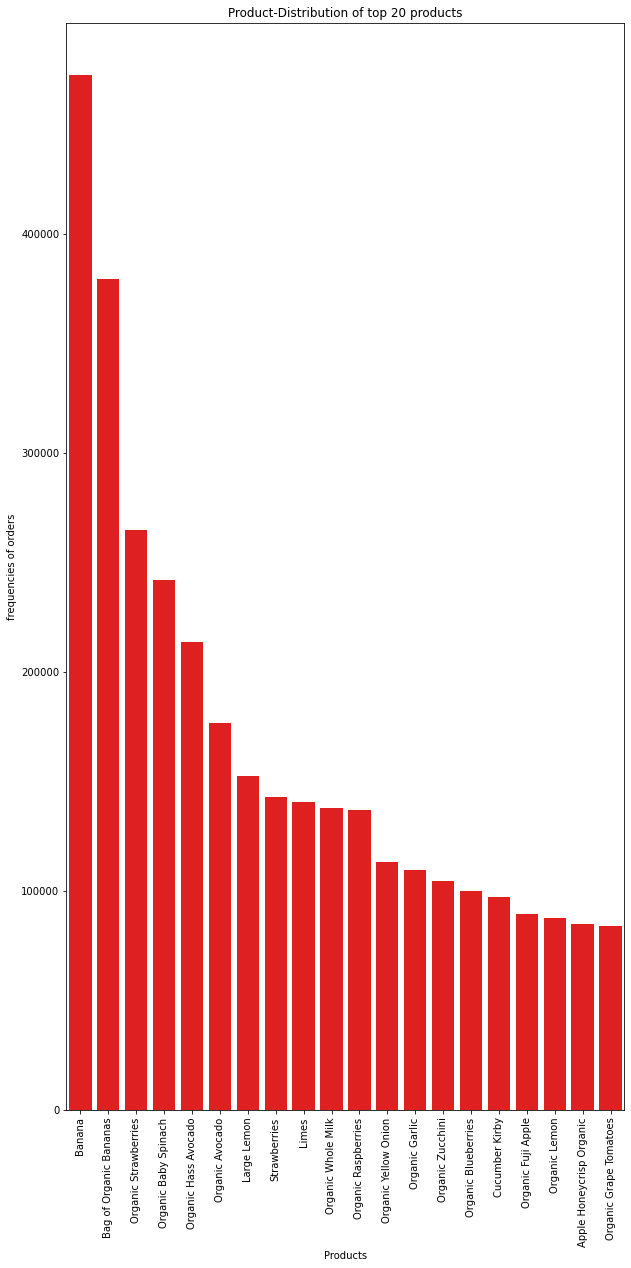

In [ ]:
var = data.product_name.value_counts()

print("There are {} products with mean orderings of {}".format(len(var.index) , np.mean(var.values)))

plt.figure(figsize=(10,20))
sns.barplot(var.index[0:20] , var.values[0:20] , color = "red")
plt.title("Product-Distribution of top 20 products")
plt.xlabel("Products")
plt.ylabel("frequencies of orders")
plt.xticks(rotation='vertical')
print("Values of the Graph :")
print(var[0:20])
plt.show()

<h3> Observations </h3>
<br>
<div>
Now as we can see that the top ordered products are fruits and vegetables
    </div>

<h3> Analysis on aisles on the dataset <h3>

There are 134 aisles with mean orderings of 242048.42537313432
Values of the Graph :
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
refrigerated                      575881
frozen produce                    522654
ice cream ice                     498425
crackers                          458838
energy granola bars               456386
eggs                              452134
lunch meat                        395130
frozen meals                      390299
baby food formula                 382456
fresh herbs                       377741
Name: aisle, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


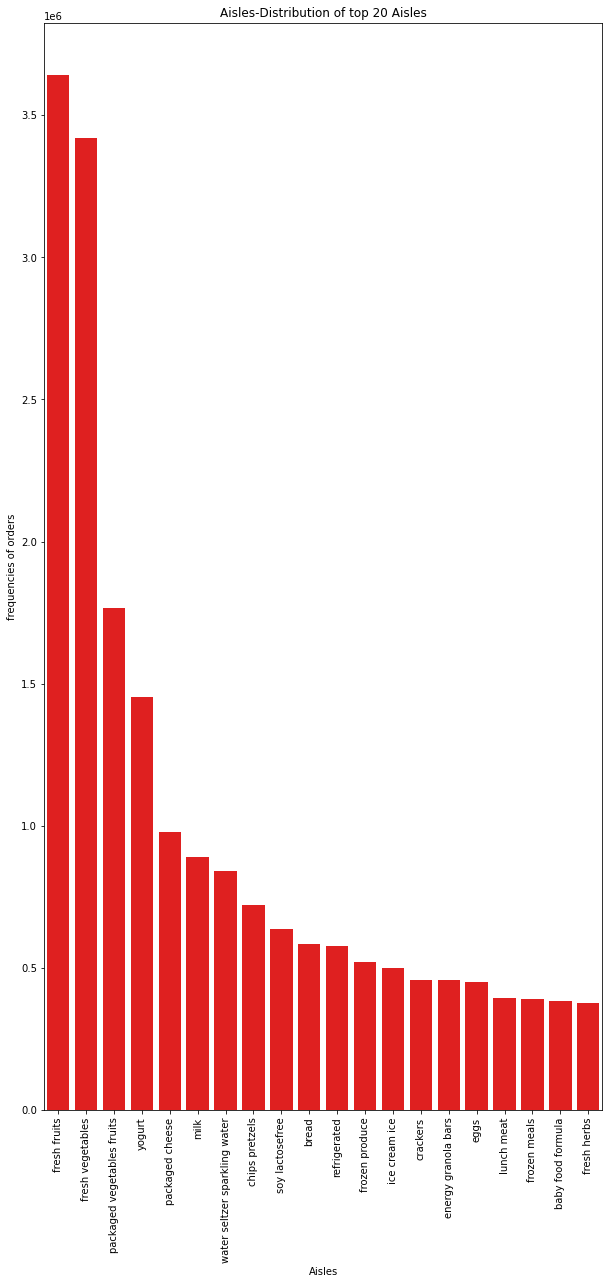

In [ ]:
var = data.aisle.value_counts()

print("There are {} aisles with mean orderings of {}".format(len(var.index) , np.mean(var.values)))

plt.figure(figsize=(10,20))
sns.barplot(var.index[0:20] , var.values[0:20] , color = "red")
plt.title("Aisles-Distribution of top 20 Aisles")
plt.xlabel("Aisles")
plt.ylabel("frequencies of orders")
plt.xticks(rotation='vertical')

print("Values of the Graph :")
print(var[0:20])
plt.show()

<h3> Observations </h3>
<br>
<div>
Here the maximum ordering frequencies are from fresh fruits anf fresh vegetables,very similar to products distribution.
</div>

<h3> Analysis on department wise </h3>


There are 21 departments with mean orderings of 1544499.4761904762
Values of the Graph :
produce            9479291
dairy eggs         5414016
snacks             2887550
beverages          2690129
frozen             2236432
pantry             1875577
bakery             1176787
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
breakfast           709569
meat seafood        708931
personal care       447123
babies              423802
international       269253
alcohol             153696
pets                 97724
missing              69145
other                36291
Name: department, dtype: int64


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


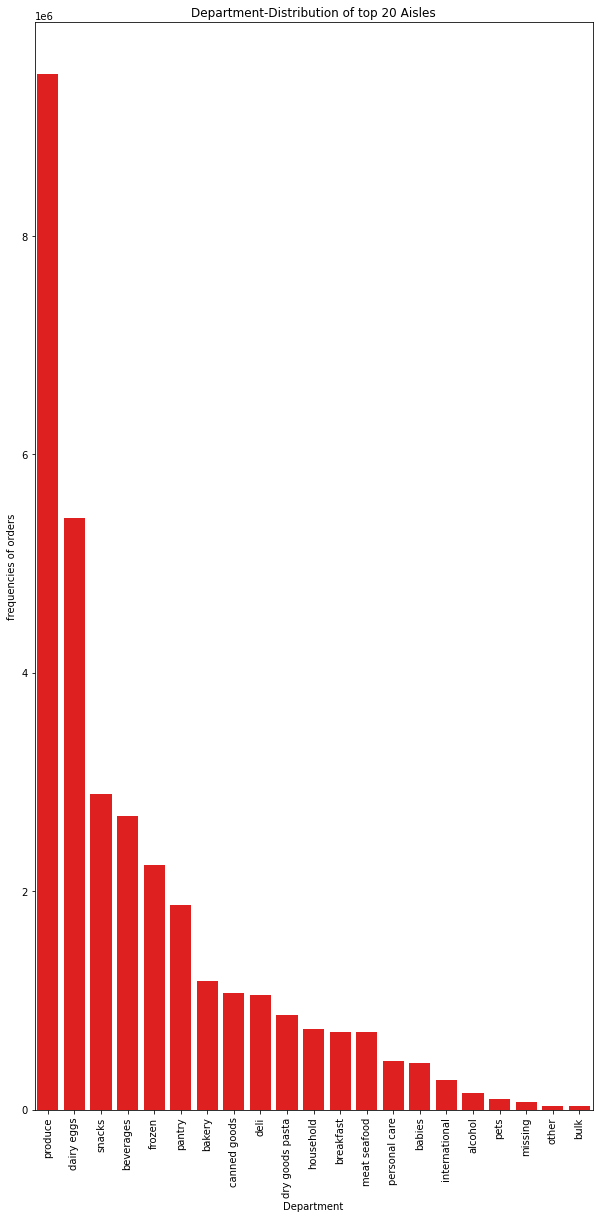

In [ ]:
var = data.department.value_counts()

print("There are {} departments with mean orderings of {}".format(len(var.index) , np.mean(var.values)))

plt.figure(figsize=(10,20))
sns.barplot(var.index, var.values , color = "red")
plt.title("Department-Distribution of top 20 Aisles")
plt.xlabel("Department")
plt.ylabel("frequencies of orders")
plt.xticks(rotation='vertical')

print("Values of the Graph :")
print(var[0:20])
plt.show()

<h3> Observations </h3>
<br>
<div>
Department distribution tells that produce and dairy eggs have the highest orderings with the reordering.
<br>

We can use the department id as index for aisles and products to see the reordering ratio with them.
</div>

<h3> Reordering ratio with departments <h3>

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Graph-Values :
         department  reordered
0           alcohol   0.569924
1            babies   0.578971
2            bakery   0.628141
3         beverages   0.653460
4         breakfast   0.560922
5              bulk   0.577040
6      canned goods   0.457405
7        dairy eggs   0.669969
8              deli   0.607719
9   dry goods pasta   0.461076
10           frozen   0.541885
11        household   0.402178
12    international   0.369229
13     meat seafood   0.567674
14          missing   0.395849
15            other   0.407980
16           pantry   0.346721
17    personal care   0.321129
18             pets   0.601285
19          produce   0.649913
20           snacks   0.574180


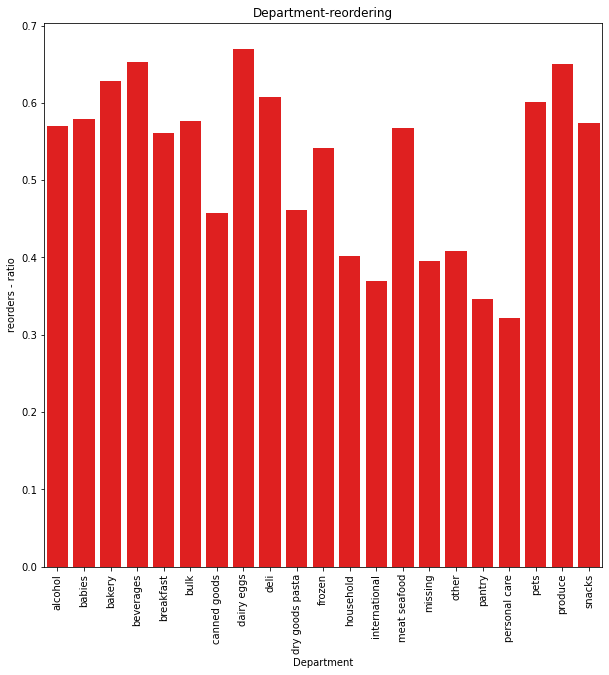

In [ ]:
var = data.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(10,10))
sns.barplot(var["department"] , var["reordered"] , color = "red")
plt.title("Department-reordering")
plt.xlabel("Department")
plt.ylabel("reorders - ratio")
plt.xticks(rotation='vertical')

print("Graph-Values :")
print(var)

<h3> Observations </h3>
<br>
<div>
Most number of reorders are of dairy eggs and least are of personal care.
</div>


<h3> Reordering ratio with add-to-cart </h3>

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Graph-Values :
     add_to_cart_order  reordered
0                    1   0.677533
1                    2   0.676251
2                    3   0.658037
3                    4   0.636958
4                    5   0.617383
..                 ...        ...
140                141   0.000000
141                142   0.000000
142                143   0.000000
143                144   0.000000
144                145   0.000000

[145 rows x 2 columns]


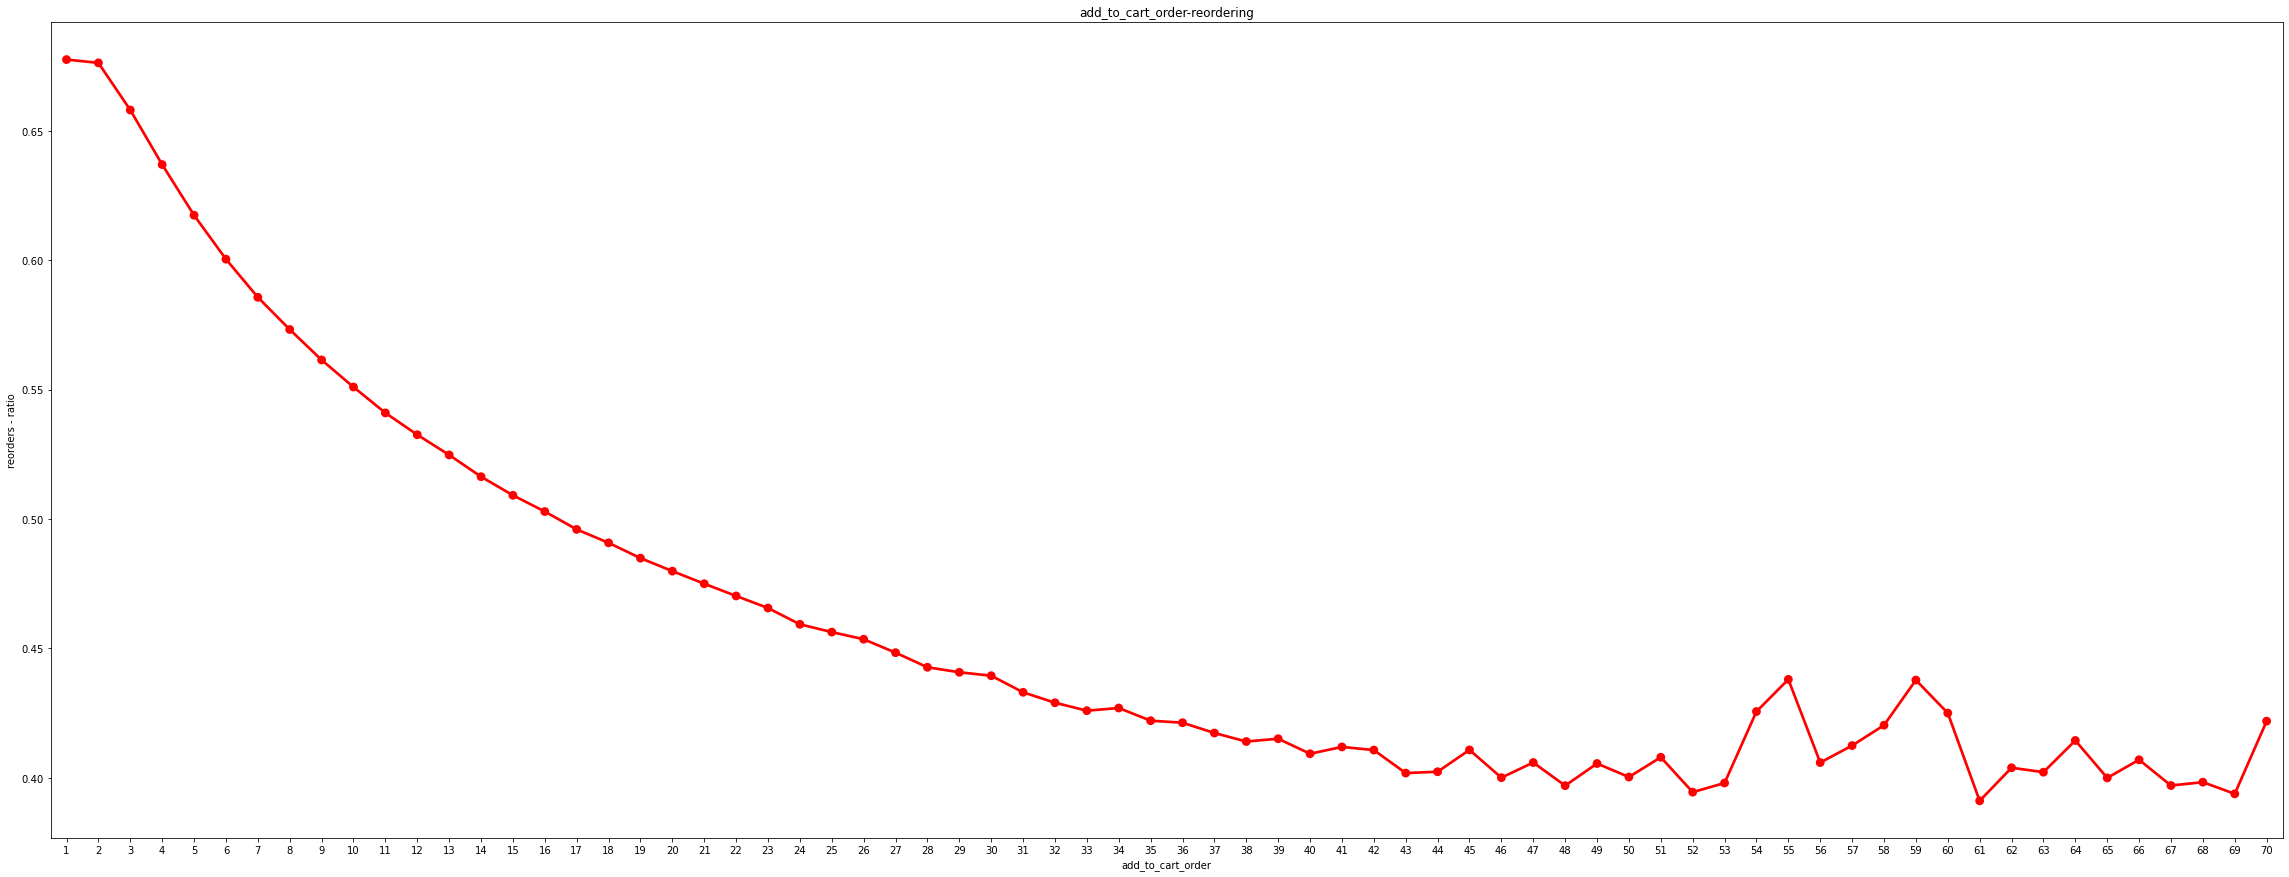

In [ ]:
var = data.groupby(["add_to_cart_order"])["reordered"].aggregate("mean").reset_index()
plt.figure(figsize=(40,15))
sns.pointplot(var["add_to_cart_order"][0:70] , var["reordered"][0:70] , color = "red")
plt.title("add_to_cart_order-reordering")
plt.xlabel("add_to_cart_order")
plt.ylabel("reorders - ratio")


print("Graph-Values :")
print(var)


<h3>Observations</h3>
<br>
<div>
    Orders which are ordered in the begining are more likely to get ordered again
    
    There is an increase in the data with less data available,it increases with some add_tocart nos but then dips again to 0,which justifies the observtion
   
</div>

  

<h3> Analysis Summary 2 </h3>
<br>
<div>
    Analysis on departments,products and aisles told many things now we see the reordering ratio dependencies with time based features.

For that we'll use train data.
    </div>
    

In [ ]:
data = pd.read_csv("Data_with_ordersid_merged.csv")
data.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,0,2539329,1,prior,1,2,8,NaN,196,1,0
1,1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [ ]:
data_train = data[data.eval_set == "train"]

data_train.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
59,59,1187899,1,train,11,4,8,14.0,196,1,1
60,60,1187899,1,train,11,4,8,14.0,25133,2,1
61,61,1187899,1,train,11,4,8,14.0,38928,3,1
62,62,1187899,1,train,11,4,8,14.0,26405,4,1
63,63,1187899,1,train,11,4,8,14.0,39657,5,1


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1384617 entries, 59 to 33819105
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Unnamed: 0              1384617 non-null  int64  
 1   order_id                1384617 non-null  int64  
 2   user_id                 1384617 non-null  int64  
 3   eval_set                1384617 non-null  object 
 4   order_number            1384617 non-null  int64  
 5   order_dow               1384617 non-null  int64  
 6   order_hour_of_day       1384617 non-null  int64  
 7   days_since_prior_order  1384617 non-null  float64
 8   product_id              1384617 non-null  int64  
 9   add_to_cart_order       1384617 non-null  int64  
 10  reordered               1384617 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 126.8+ MB


<h3> Reorder Ratio with order_dow <h3>

   order_dow  reordered
0          0   0.609624
1          1   0.598977
2          2   0.588365
3          3   0.586724
4          4   0.594632
5          5   0.606178
6          6   0.594238


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'reorders - ratio')

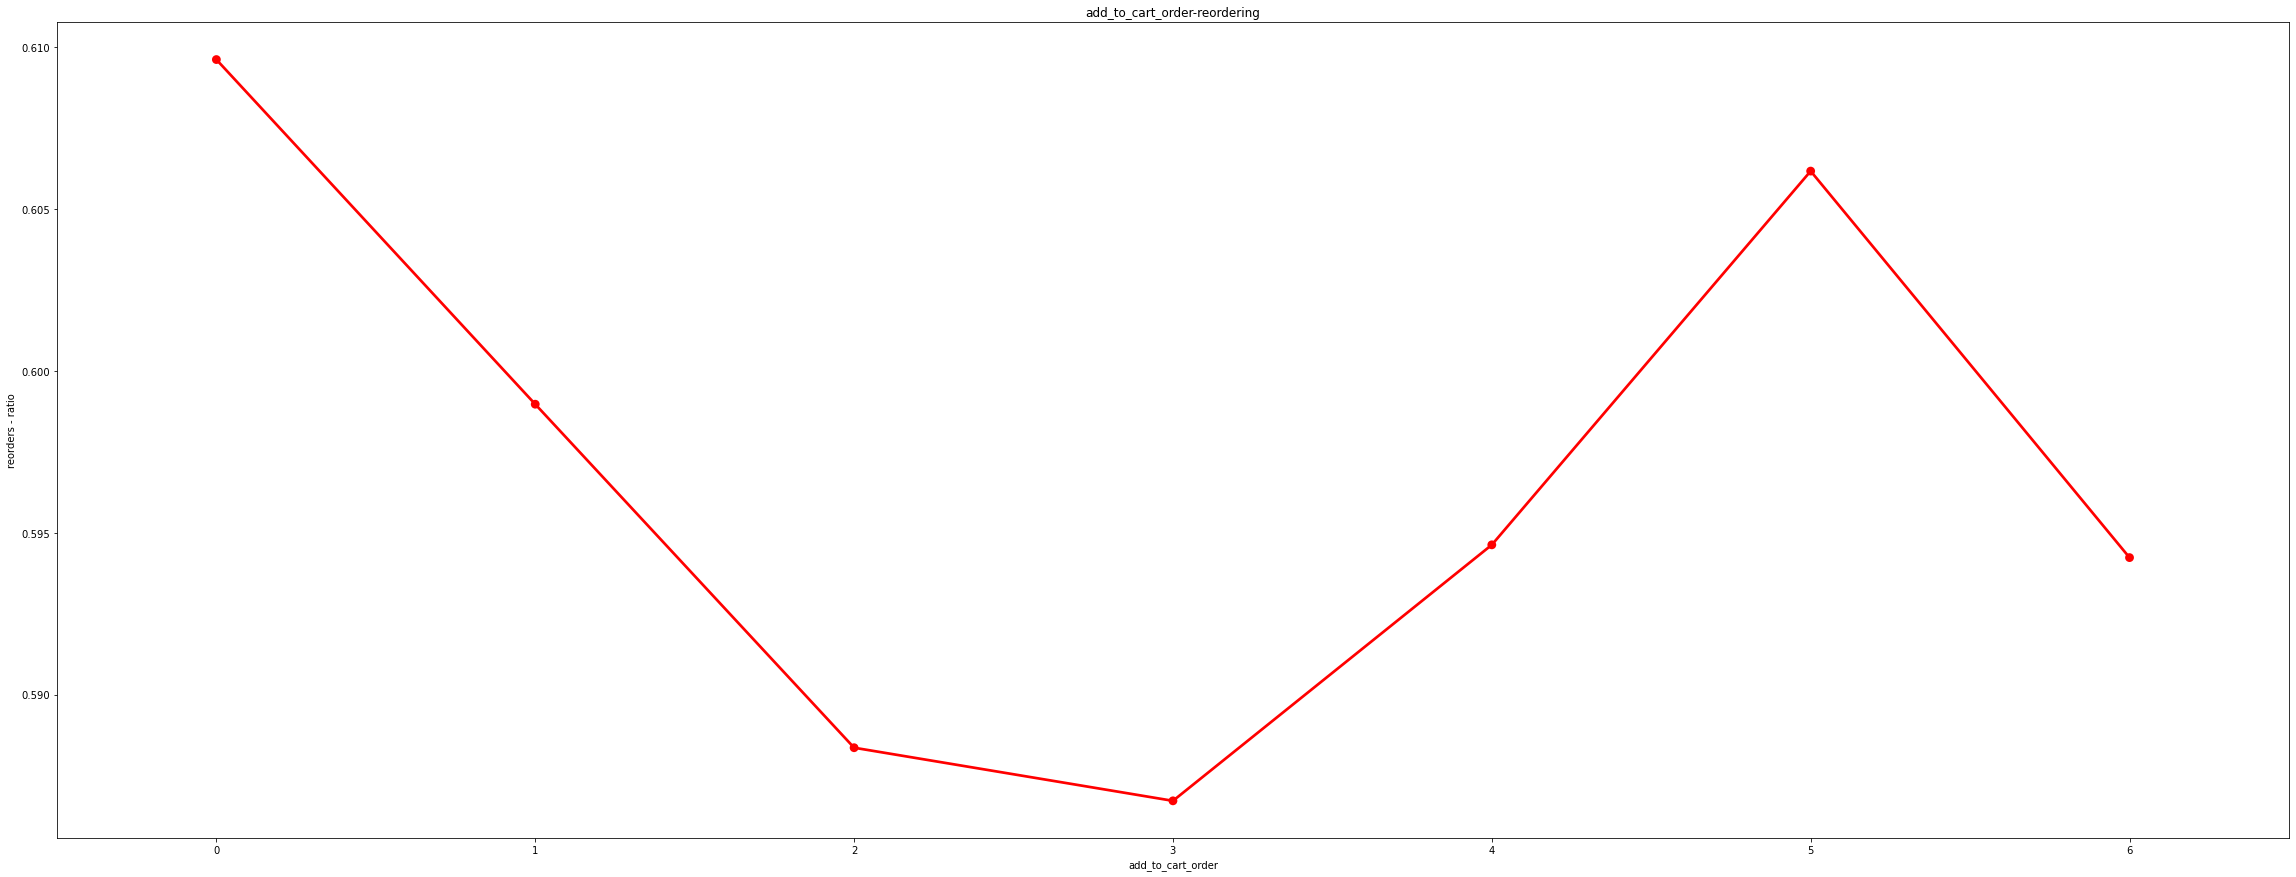

In [ ]:
var = data_train.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

print(var)
plt.figure(figsize=(40,15))
sns.pointplot(var["order_dow"], var["reordered"] , color = "red")
plt.title("add_to_cart_order-reordering")
plt.xlabel("add_to_cart_order")
plt.ylabel("reorders - ratio")


<h3> Observations </h3>
  
 <div>
    Maximum reorders are done on saturday and thursday.
    </div>
    

<h3> Reorder Ratio with order_hour_of_day </h3>

    order_hour_of_day  reordered
0                   0   0.571177
1                   1   0.579453
2                   2   0.579665
3                   3   0.581624
4                   4   0.598108
5                   5   0.622823
6                   6   0.650629
7                   7   0.649496
8                   8   0.643353
9                   9   0.623263
10                 10   0.606378
11                 11   0.594423
12                 12   0.587193
13                 13   0.589533
14                 14   0.592201
15                 15   0.583384
16                 16   0.588795
17                 17   0.592177
18                 18   0.584747
19                 19   0.590529
20                 20   0.596921
21                 21   0.607934
22                 22   0.604195
23                 23   0.589979


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'reorders - ratio')

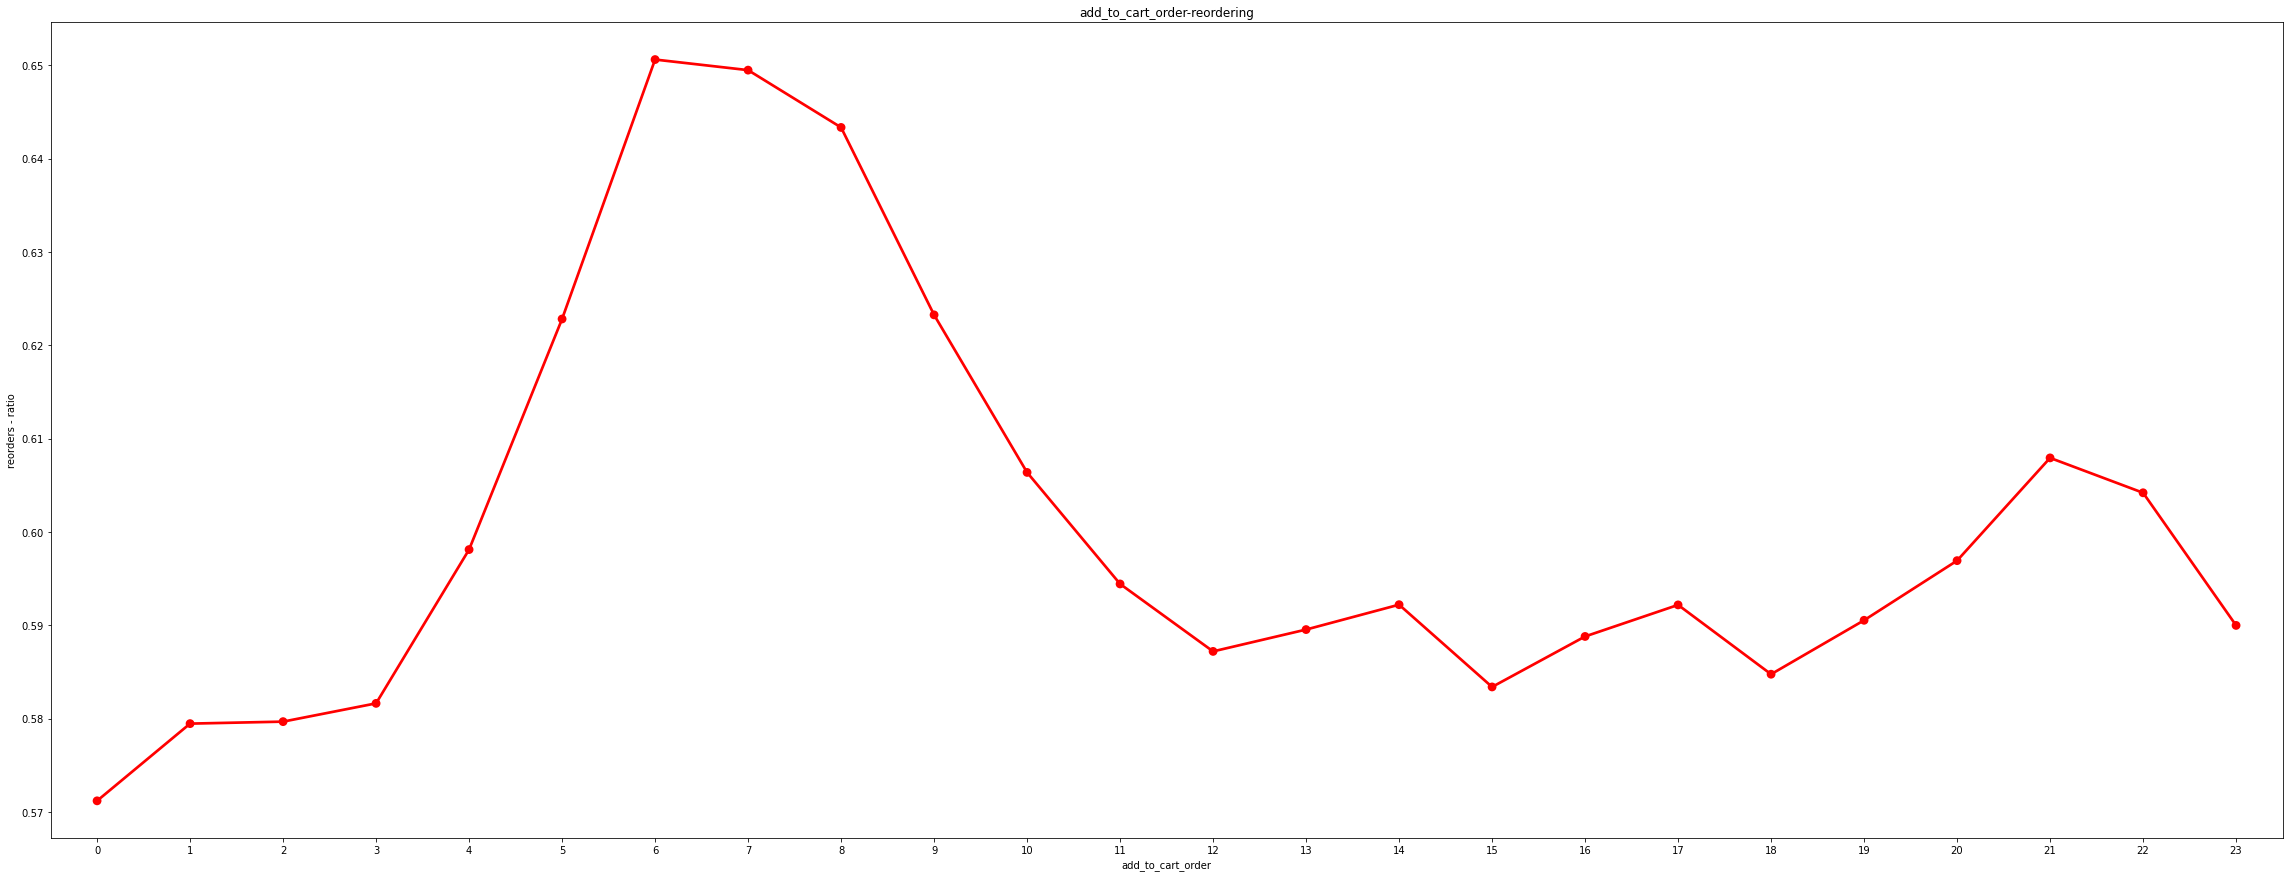

In [ ]:
var = data_train.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

print(var)
plt.figure(figsize=(40,15))
sns.pointplot(var["order_hour_of_day"], var["reordered"] , color = "red")
plt.title("add_to_cart_order-reordering")
plt.xlabel("add_to_cart_order")
plt.ylabel("reorders - ratio")

<h3> Combining the Day_of_oreder and hour of the day <h3>

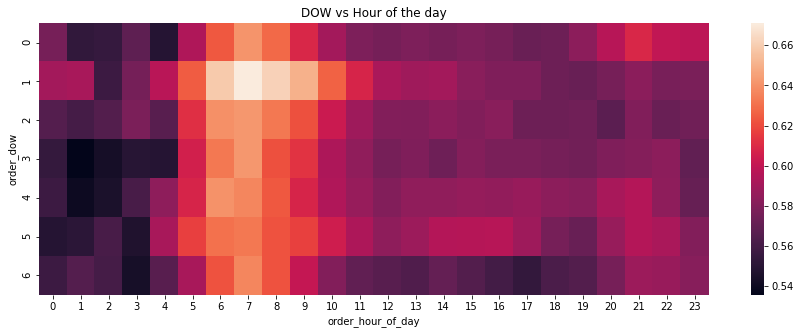

In [ ]:
var = data.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

var = var.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(15,5))

sns.heatmap(var , color="pink")
plt.title("DOW vs Hour of the day")

plt.show()

<h3> Observations </h3>
    <div>
    Maximum reorders are done on the sunday morning,and all the reorders are happening basically in the early morning. 
    </div>